In [2]:
# clear all the variables
%reset -f

In [5]:
# import the relevant libraries
import time
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from scipy.stats import norm, moment
from math import gamma, sin, pi

## Spectral densities
  Instead of analysing a stochastic process in time domain, one could consider the *spectral* (or *frequency*) *domain* of a stationary process. The general expression of the spectral density is
  
$$
f(\lambda)\equiv \sum^{\infty}_{j=-\infty}\gamma(j)\exp{(ij\lambda)}, \hspace{2em} -\pi\leq\lambda\leq\pi
$$

where $\gamma(\cdot)$ denotes the autocovariance function of the process. For *fractional gaussian noise*, the density can be written as 

$$
f(\lambda) = 2\sin(\pi H)\Gamma(2H + 1)(1-\cos\lambda)\left[\vert\lambda\vert^{-2H-1} + B(\lambda, H)\right]
$$

where 

$$
B(\lambda, H) \equiv \sum^{\infty}_{j = 1}\left\{ (2\pi j + \lambda)^{-2H-1} + (2\pi j-\lambda)^{-2H-1} \right\}
$$

to numerically evaluate $B(\lambda, H)$, its infinite sum must be truncated. Paxson suggest the following formula:

$$
\tilde B_3(\lambda, H) \equiv \sum^3_{j=1}\left\{2\pi j+\lambda)^{-2H-1} + (2\pi j - \lambda)^{-2H-1}\right\} + \frac{(6\pi + \lambda)^{-2H} + (6\pi - \lambda)^{-2H} + (8\pi + \lambda)^{-2H} + (8\pi - \lambda)^{-2H}}{8H\pi}
$$

Then, he analyzed the relative error of this approximation and corrects the mean absolute error and linear variation in $\lambda$ by fitting a modified form. As a final approximation for $B(\lambda, H)$ Paxson proposed:

$$
\tilde B(\lambda, H) = (1.0002 - 0.000134\lambda)\left\{\tilde B_3(\lambda, H) - 2^{-7.65H-7.4}\right\}
$$

## The (improved) Paxson Method

### Spectral simulation

  We assume again that $N=2^c, c\in\mathbb N$. The spectral analysis of a stationary discrete-time Gaussian process $X=\{X_n,n=0,\ldots,N-1\}$ shows that it can be represented in terms of the spectral density as:
  
$$ 
X_n \sim \int^\pi_0 \sqrt{\frac{f(\lambda)}{\pi}}\cos(n\lambda)dB_1(\lambda) - \int^\pi_0 \sqrt{\frac{f(\lambda)}{\pi}}\sin(n\lambda)dB_2(\lambda) 
$$

where $B_1,B_2$ are mutually independent Brownian motions and $f(\lambda)$ is the **spectral density of a general real-valued stationary Gaussian process**.
    Spectral simulation is based on approximating the equation above by replacing the integrand by a simple function. Define $\xi_n(\lambda)=\sqrt{f(\lambda)/\pi}\cos(n\lambda)$. For some fix integer $\mathscr l$, we define $t_k = \pi k/\mathscr l$ for $k=0,\ldots,\mathscr{l} - 1$ and $\xi_n^{(\mathscr l)}$ defined on $[0,\pi]$ for $0 \leq n \leq N-1$ by
    
$$ 
\xi_n^{(\mathscr l)}(\lambda) = \sqrt{\frac{f(t_1)}{\pi}}\cos(nt_1)\mathbb 1_{0}(\lambda) + \sum_{k=0}^{\mathscr l-1}\sqrt{\frac{f(t_1)}{\pi}}\cos(nt_{k+1})\mathbb 1_{(t_k,t_{k+1}]}(\lambda)
$$

Similarly, let $\theta_n^{(\mathscr l)}$ defined on $[0,\pi]$ for $0 \leq n \leq N-1$ by

$$ 
\theta_n^{(\mathscr l)}(\lambda) = \sqrt{\frac{f(t_1)}{\pi}}\sin(nt_1)\mathbb 1_{0}(\lambda) + \sum_{k=0}^{\mathscr l-1}\sqrt{\frac{f(t_1)}{\pi}}\sin(nt_{k+1})\mathbb 1_{(t_k,t_{k+1}]}(\lambda)
$$

We can then approximate $X_n$ with $\hat{X}_n^{(\mathscr l)}$ defined as:

$$ 
\hat{X}_n^{(\mathscr{l})} = \sum_{k=0}^{\mathscr{l}-1}\sqrt{\frac{f(t_1)}{\pi}}\left[\cos(nt_{k+1})U^{(0)}_k - \sin(nt_{k+1})U^{(1)}_k\right]
$$

where $U_k^{(i)}$ are i.i.d standard normal random variables for $k=0,\ldots ,\mathscr{l}-1$. Besides, $U^{(0)}$ and $U^{(1)}$ should also be mutually independent. To compute the approximation $\hat{X}_n^{(\mathscr{l})}$ efficiently, we define the sequence $(a_k)_{k=0,\ldots ,2\mathscr{l}-1}$ by

$$
a_k = \left\{ 
\begin{array}{ll}
0 & k=0 \\
\frac{1}{2}\left(U^{(0)}_{k-1} + iU^{(1)}_{k-1}\right)\sqrt{f(t_k)/\mathscr{l}} & k=1,\ldots, \mathscr{l}-1\\
U^{(0)}_{k-1}\sqrt{f(t_k)/\mathscr{l}} & k=\mathscr{l} \\
\frac{1}{2}\left(U^{(0)}_{2\mathscr{l}-k-1} - iU^{(1)}_{2\mathscr{l}-k-1}\right)\sqrt{f(t_{2\mathscr{l}-k})/\mathscr{l}} & k=\mathscr{l} + 1,\ldots ,2\mathscr{l}-1 \\
\end{array}
\right.
$$

then, one can check that the Fourier transform of $a_k$ is real and equals $\hat{X}_n^{(\mathscr{l})}$.   

### Convergence
  We study here if the previous argument apply asymptotically, i.e. when $\lim_{\mathscr{l}\rightarrow +\infty}\hat{X}_n^{(\mathscr{l})}$. First the covariance structure between $\hat{X}_n^{(\mathscr{l})}$ and $\hat{X}_m^{(\mathscr{l})}$ for $n, m = 0,\ldots , N-1$ is given by
  
$$
Cov(\hat{X}_n^{(\mathscr{l})}, \hat{X}_m^{(\mathscr{l})}) = \sum^{\mathscr{l}-1}_{k=0}\frac{f(t_{k})}{\mathscr{l}}\cos{((m - n)t_{k + 1})}
$$

which depends only on $m-n$. Clearly,

$$
\lim_{\mathscr{l} \rightarrow +\infty} Cov(\hat{X}_n^{(\mathscr{l})}, \hat{X}_m^{(\mathscr{l})}) = \frac{1}{2\pi}\int^{\pi}_{-\pi}f(\lambda)\exp{(-i(m-n))}d\lambda = \gamma(\vert m-n\vert)
$$

from this fact, it is not difficult to deduce that the finite-dimentional distribution of $\hat{X}_n^{(\mathscr{l})}$ converge in distribution to the corresponding finite-dimentional distributions of $X$ as $\mathscr{l}\rightarrow +\infty$.

### The Paxson method
  In the Paxson method, the approximate fractional gaussian noise sample is the Fourier transform of 
$$
b_k = \left\{ 
\begin{array}{ll}
0 & k=0 \\
\sqrt{\frac{R_kf(t_k)}{N}}\exp{(i\Phi_k)} & k=1,\ldots, N/2\\
b^*_{N-k} & k=N/2 + 1,\ldots ,N-1 \\
\end{array}
\right.
$$
where $R_k$ are independent exponentially distributed random variables with mean 1 for $k \geq 1$ and $b^*_k$ is the complex conjugate of $b_k$. Besides $\Phi_{N/2}$ which is set to zero, the $\Phi_k$ are independent uniformly distributed random variables on $[0, 2\pi]$ for $k\geq 1$. Hence 

$$
\sqrt{2R_k}\exp{(i\Phi_k)} \sim U_k^{(0)} + iU_k^{(1)}
$$

where $U_k^{(0)}$ and $U_k^{(1)}$ are independant standard normal random variables (this fact is also used in the Box-Muller algorithm to simulate Gaussian random variables). Note that the generated sample is real by construction.

### Comparison to the Spectral Simulation Method
  If we set $\mathscr{l}=N/2$ in the spectral simulation method, the sample is the Fourier transform of
  
$$
b^{'}_k = \left\{ 
\begin{array}{ll}
0 & k=0 \\
\sqrt{\frac{f(t_k)}{2N}}\left(U_{k-1}^{(0)}+iU_{k-1}^{(1)}\right) & k=1,\ldots, N/2 - 1\\
\sqrt{\frac{2f(t_k)}{N}}U_{k-1}^{(0)} & k=N/2\\
\sqrt{\frac{f(t_k)}{2N}}\left(U_{N-k-1}^{(0)}-iU_{N-k-1}^{(1)}\right) & k=N/2 + 1,\ldots, N - 1\\
\end{array}
\right.
$$

At this stage, it becomes clear the Paxson method only diverge from the spectral simulation method by the value of $b_{N/2}$. However, the difference will vanish for large $N$ and does not affect the conveergence result from the previous section.

## Python implementation (part 1)
   According to the method exposed above, the computation is done with the following steps:
   - generate some $(U_{k}^{(0)}, U_{k}^{(1)})^N_{k=1}$ sequence.
   - generate the $b^{'}_k$s according to the equations above
   - compute the fourier transform of the resulting $b_k$s using the Fast Fourier Transform algorithm

In [13]:
# we define some useful functions

# returns the estimate for B_3(lambda, H)
def b3Est(l, H):
    d = -2.0 * H - 1.0
    dprime = -2.0 * H
    
    res = (6.0 * pi + l) ** dprime + (6.0 * pi - l) ** dprime + (8.0 * pi + l) ** dprime + (8.0 * pi - l) ** dprime
            
    res = res / (8.0 * H * pi)
    
    res = res + (2.0 * pi + l) ** d + (2.0 * pi - l) ** d
    res = res + (4.0 * pi + l) ** d + (4.0 * pi - l) ** d
    return res + (6.0 * pi + l) ** d + (6.0 * pi - l) ** d
    
# returns the adjusted estimate
def bEstAdj(l, H):
    return (1.0002 - 0.000134 * l) * (b3Est(l, H) - 2.0 ** (-7.65 * H - 7.64))
    
# approximate the spectral density of the process
def spectrum(l, H):
    g = gamma(2.0 * H + 1.0)
    return 2.0 * np.sin(pi * H) * g * (1.0 - np.cos(l)) * (abs(l) ** (-2.0 * H - 1.0) + bEstAdj(l, H))

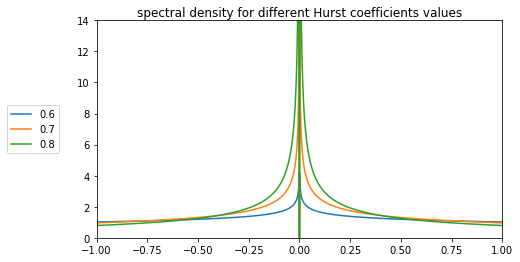

In [51]:
H = [0.6, 0.7, 0.8]
l = np.arange(-1.0, 1.001, 0.001)

res = zip(H, [spectrum(l, h) for h in H])

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(221)
[ax.plot(l, s[1], label=s[0]) for s in res]
ax.set_title('spectral density for different Hurst coefficients values')
ax.legend(loc='center right', bbox_to_anchor=(-0.08, 0.5))
ax.set_ylim(0.0, 14.0)
ax.set_xlim(-1.0, 1.0)
fig.subplots_adjust(hspace=.5)
plt.show()

In [25]:
def paxson(H, n, T, cum, seed = None):
    
    # - H: the Hurst exponent
    # - n: determines the size of the sample (sz = 2^n)
    # - T: max time
    # - cum: boolean indicating if we accumulate
    # - seed: the seed for RNG for debugging
    # returns an array of double
    size = 2 ** n
    
    # mem allocation
    phi = np.empty(size, dtype=float)
    psi = np.empty(size, dtype=float)
    cov = np.empty(size, dtype=float)
    ret = np.empty(size, dtype=float)
    
    # for debug
    np.random.seed(seed)
    
    # step 0
    v = 1
    phi[0] = 0
    ret[0] = np.random.standard_normal(1)
    
    # first compute the covariance coefficients
    for i in range(0, size):
        cov[i] = covariance(i, H);

    # main loop
    for i in range(1, size):
        phi[i - 1] = cov[i]
        
        for j in range(0, i - 1):
            psi[j] = phi[j]
            phi[i - 1] = phi[i - 1] - psi[j] * cov[i - j - 1]
            
        phi[i - 1] = phi[i - 1] / v
        
        for j in range(0, i - 1):
            phi[j] = psi[j] - phi[i - 1] * psi[i - j - 2]
        
        v = v * (1 - phi[i - 1] ** 2)
        
        ret[i] = 0.0
        
        for j in range(0, i):
            ret[i] = ret[i] + phi[j] * ret[i - j - 1]
            
        ret[i] = ret[i] + np.sqrt(v) * np.random.standard_normal(1)
 
    # rescaling
    scaling = (T / size) ** H
    ret *= scaling
        
    if cum:
        return np.cumsum(ret)
    else:
        return ret

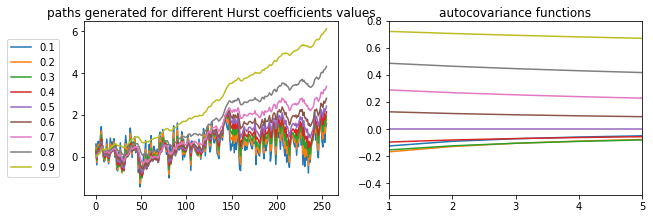

In [47]:
# step 1: we compare distributions
hurst = np.linspace(0.1, 1.0, 9, endpoint = False)
T = 10.0
size = 8

start = time.clock()

# we set the seed once for all the paths
seed = np.random.randint(0, 1000)

res1 = zip(hurst, [hosking(x, size, T, True, seed) for x in hurst])
#print("computation done in {} seconds".format(time.clock() - start))

values = np.arange(1.0,5.1,0.1)
res2 = zip(hurst, [[covariance(i, x) for i in values] for x in hurst])

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(221)
[ax1.plot(s[1], label=s[0]) for s in res1]
ax1.set_title('paths generated for different Hurst coefficients values')
ax1.legend(loc='center right', bbox_to_anchor=(-0.08, 0.5))

# plot the covariance function for selected values of H
ax2 = fig.add_subplot(222)
[ax2.plot(s[1], label=s[0]) for s in res2]
ax2.set_title('autocovariance functions')
ax2.set_xlim(values.min(), values.max())

fig.subplots_adjust(hspace=.5)
plt.show()

computation done in 54.2530986007 seconds


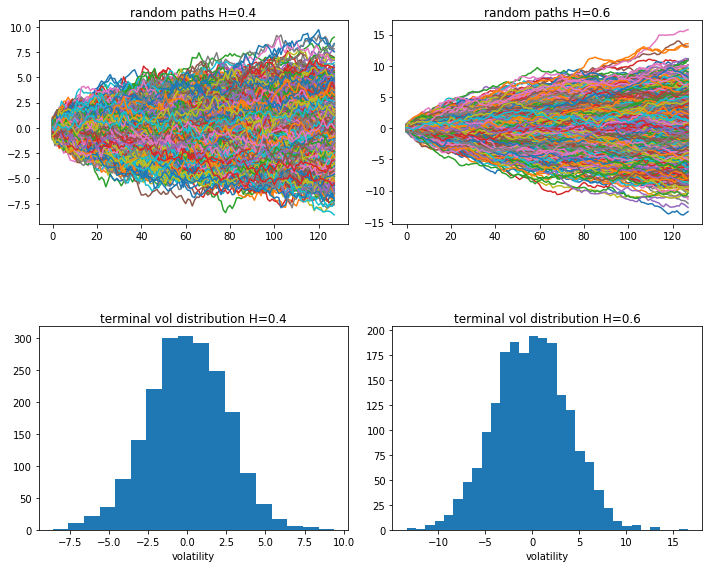

In [62]:
# step 2: generate N paths with H = 0.8 coefficient 
hurst = [0.4, 0.6]
T = 10.0
size = 7
N = 2000

start = time.clock()
res3 = [hosking(hurst[0], size, T, True) for x in range(N)]
res4 = [hosking(hurst[1], size, T, True) for x in range(N)]
print("computation done in {} seconds".format(time.clock() - start))

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(221)

ts = [[], []];
for i in res3:
    ts[0] = ts[0] + ax1.plot(i)

ax1.set_title('random paths H=' + str(hurst[0]))
ax1.legend(loc='center right', bbox_to_anchor=(-0.08, 0.5))

ax2 = fig.add_subplot(222)

for i in res4:
    ts[1] = ts[1] + ax2.plot(i)

ax2.set_title('random paths H=' + str(hurst[1]))
ax2.legend(loc='center right', bbox_to_anchor=(-0.08, 0.5))

# get the terminal values
term = [[i.get_ydata()[-1] for i in j] for j in ts]

# create the histograms
binwidth = 1

ax3 = fig.add_subplot(223)
ax3.title.set_text('terminal vol distribution H=' + str(hurst[0]))
ax3.hist(term[0], bins=np.arange(min(term[0]), max(term[0]) + binwidth, binwidth))
ax3.set_xlabel("volatility")

ax4 = fig.add_subplot(224)
ax4.title.set_text('terminal vol distribution H=' + str(hurst[1]))
ax4.hist(term[1], bins=np.arange(min(term[1]), max(term[1]) + binwidth, binwidth))
ax4.set_xlabel("volatility")

fig.tight_layout()
fig.subplots_adjust(hspace=.5)
plt.show()

In [63]:
print([[moment(x, i) for i in range(1, 5)] for x in term])

[[0.0, 6.260623848657362, -0.97791548872506184, 122.85763717429998], [0.0, 15.484246268804961, 1.8522533737557583, 726.36351540511941]]
